In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [89]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [90]:
pd.set_option('display.max_columns',None)

In [91]:
df = pd.read_csv('practice-datasets/Airline_Delay_Cause.csv')
df.shape

(179338, 21)

In [92]:
df.sample(5)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
142126,2017,12,OO,SkyWest Airlines Inc.,OKC,"Oklahoma City, OK: Will Rogers World",329.0,81.0,32.13,1.54,24.18,0.0,23.14,1.0,5.0,5293.0,2693.0,101.0,818.0,0.0,1681.0
6092,2023,9,DL,Delta Air Lines Network,DTW,"Detroit, MI: Detroit Metro Wayne County",4737.0,564.0,212.55,20.93,114.17,0.0,216.35,9.0,2.0,49054.0,25613.0,1535.0,5674.0,0.0,16232.0
111885,2019,3,UA,United Air Lines Network,CID,"Cedar Rapids/Iowa City, IA: The Eastern Iowa",65.0,10.0,2.56,1.27,1.44,0.0,4.73,2.0,0.0,505.0,68.0,59.0,38.0,0.0,340.0
114433,2019,1,EV,ExpressJet Airlines Inc.,GRB,"Green Bay, WI: Green Bay Austin Straubel Inter...",1.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141040,2018,1,ZW,Air Wisconsin Airlines Corp,HSV,"Huntsville, AL: Huntsville International-Carl ...",7.0,1.0,0.00,0.00,0.00,0.0,1.00,0.0,0.0,156.0,0.0,0.0,0.0,0.0,156.0


# Data Cleaning

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay        

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,179338.0,2019.480082,2.410204,2015.0,2018.00,2020.00,2022.00,2023.00
month,179338.0,6.485725,3.463516,1.0,3.00,6.00,9.00,12.00
arr_flights,178997.0,327.816969,931.001446,1.0,41.00,89.00,218.00,21977.00
arr_del15,178747.0,58.709086,164.378035,0.0,6.00,15.00,40.00,4176.00
carrier_ct,178997.0,18.572643,47.389651,0.0,1.96,5.40,14.70,1293.91
weather_ct,178997.0,2.035742,6.894812,0.0,0.00,0.22,1.62,266.42
nas_ct,178997.0,17.094929,56.279604,0.0,1.00,3.30,9.86,1884.42
security_ct,178997.0,0.145307,0.702149,0.0,0.00,0.00,0.00,58.69
late_aircraft_ct,178997.0,20.778477,64.912766,0.0,1.00,4.29,13.01,2069.07
arr_cancelled,178997.0,6.830103,41.446756,0.0,0.00,1.00,3.00,4951.00


In [95]:
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
dtype: int64

In [96]:
df.duplicated().sum()

0

In [97]:
#removing the 341 null rows as the columns had null values
df = df.dropna(subset=['arr_flights'])

In [98]:
# imputing null values of arr_del15
df['arr_del15'] = df.groupby(['arr_flights'])['arr_del15'].transform(lambda x: x.fillna(x.median()))

In [99]:
df.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [100]:
df = df.drop(columns=['airport_name', 'carrier_name'])

In [101]:
df['flights_landed'] = df['arr_flights'] - df['arr_cancelled']

In [102]:
df.sample(5)

,year,month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,flights_landed
61669,2021,4,MQ,FSM,88.0,6.0,1.00,2.68,2.32,0.00,0.00,3.0,0.0,280.0,89.0,116.0,75.0,0.0,0.0,85.0
116622,2018,12,9E,EYW,33.0,12.0,3.86,1.17,4.87,0.00,2.10,0.0,0.0,1542.0,345.0,821.0,185.0,0.0,191.0,33.0
67806,2021,1,OO,RIC,37.0,3.0,3.00,0.00,0.00,0.00,0.00,0.0,0.0,98.0,98.0,0.0,0.0,0.0,0.0,37.0
42605,2022,2,MQ,BTR,70.0,10.0,3.01,2.00,2.17,0.00,2.81,9.0,0.0,506.0,191.0,94.0,82.0,0.0,139.0,61.0
178165,2015,1,AA,DFW,12466.0,2463.0,645.29,64.66,765.92,4.14,982.99,203.0,6.0,167313.0,66714.0,5055.0,24137.0,123.0,71284.0,12263.0


In [103]:
# Separate categorical and numerical features
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", categorical_cols.tolist())
print("Numerical Columns:", numerical_cols.tolist())

Categorical Columns: ['carrier', 'airport']
Numerical Columns: ['year', 'month', 'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'flights_landed']


C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


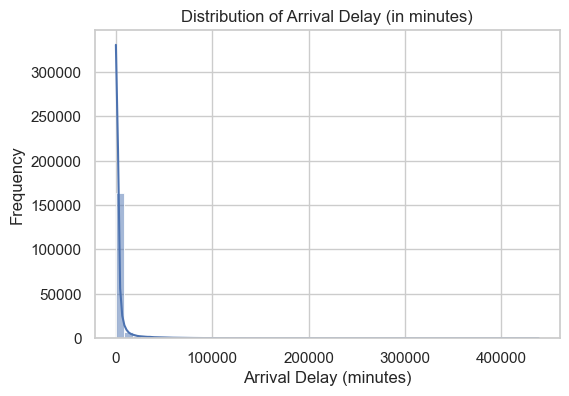

In [104]:
plt.figure(figsize=(6, 4))
sns.histplot(df['arr_delay'], bins=50, kde=True)
plt.title("Distribution of Arrival Delay (in minutes)")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Frequency")
plt.show()
# from this we can see that the graph is highly right skewed thus mostly delay is on the lowerbound of the graph

# EDA (Univariate and Bivariate analysis)


Value counts for carrier:
carrier
OO    23771
DL    14937
MQ    11282
AA    10911
UA    10407
WN    10051
EV     8766
G4     8760
F9     8305
AS     7753
Name: count, dtype: int64


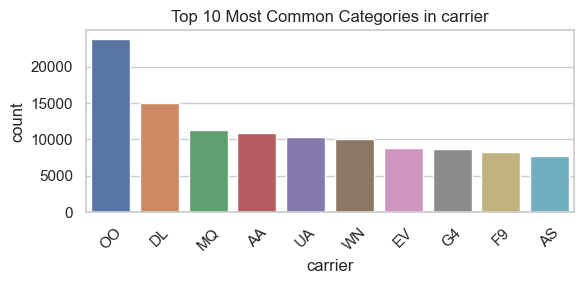


Value counts for airport:
airport
CLE    1591
DTW    1579
BNA    1549
PIT    1536
IND    1532
ORD    1502
MCI    1496
RDU    1475
CHS    1466
RIC    1446
Name: count, dtype: int64


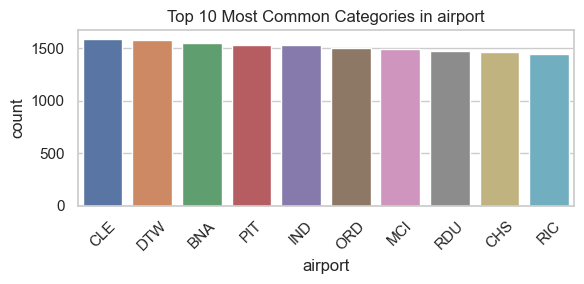

In [105]:
# Separate categorical and numerical features
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts().head(10))  # Top 10
    plt.figure(figsize=(6,3))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:10])
    plt.title(f"Top 10 Most Common Categories in {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Carrier Distribution**:
OO (SkyWest Airlines) dominates with 23,756 flights, followed by DL (Delta) with 14,928 flights.
The top 10 carriers show significant variation in flight volumes, indicating market concentration.

**Airport Distribution**:
Cleveland (CLE) leads with 1,590 records, followed by Detroit (DTW) with 1,579.
Airport distribution appears more balanced compared to carrier concentration.

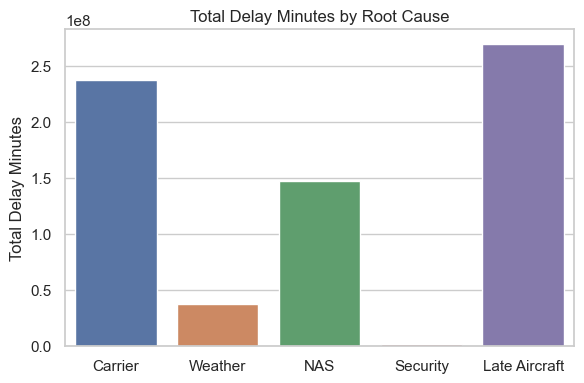

In [106]:
cause_totals = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum()
cause_totals.index = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']

plt.figure(figsize=(6, 4))
sns.barplot(x=cause_totals.index, y=cause_totals.values)
plt.title('Total Delay Minutes by Root Cause')
plt.ylabel('Total Delay Minutes')
plt.tight_layout()
plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


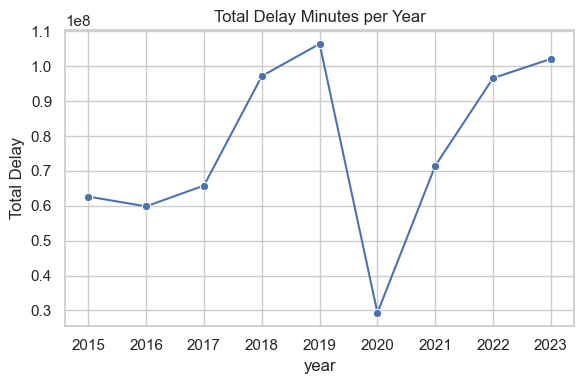

In [107]:
yearly_delay = df.groupby('year')['arr_delay'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.lineplot(data=yearly_delay, x='year', y='arr_delay', marker='o')
plt.title('Total Delay Minutes per Year')
plt.ylabel('Total Delay')
plt.tight_layout()
plt.show()

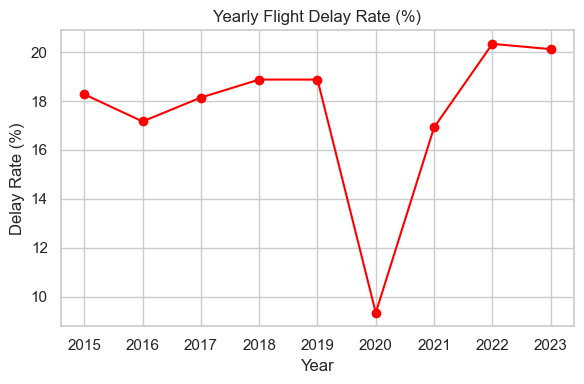

In [108]:
yearly = df.groupby('year')[['arr_del15', 'arr_flights']].sum()
yearly['delay_rate'] = (yearly['arr_del15'] / yearly['arr_flights']) * 100

plt.figure(figsize=(6, 4))
yearly['delay_rate'].plot(kind='line', marker='o', color='red')
plt.title('Yearly Flight Delay Rate (%)')
plt.xlabel('Year')
plt.ylabel('Delay Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

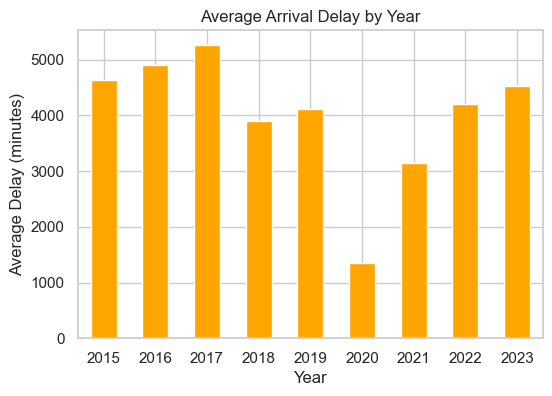

In [109]:
yearly_avg_delay = df.groupby('year')['arr_delay'].mean()

plt.figure(figsize=(6, 4))
yearly_avg_delay.plot(kind='bar', color='orange')
plt.title('Average Arrival Delay by Year')
plt.xlabel('Year')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=0)
plt.show()

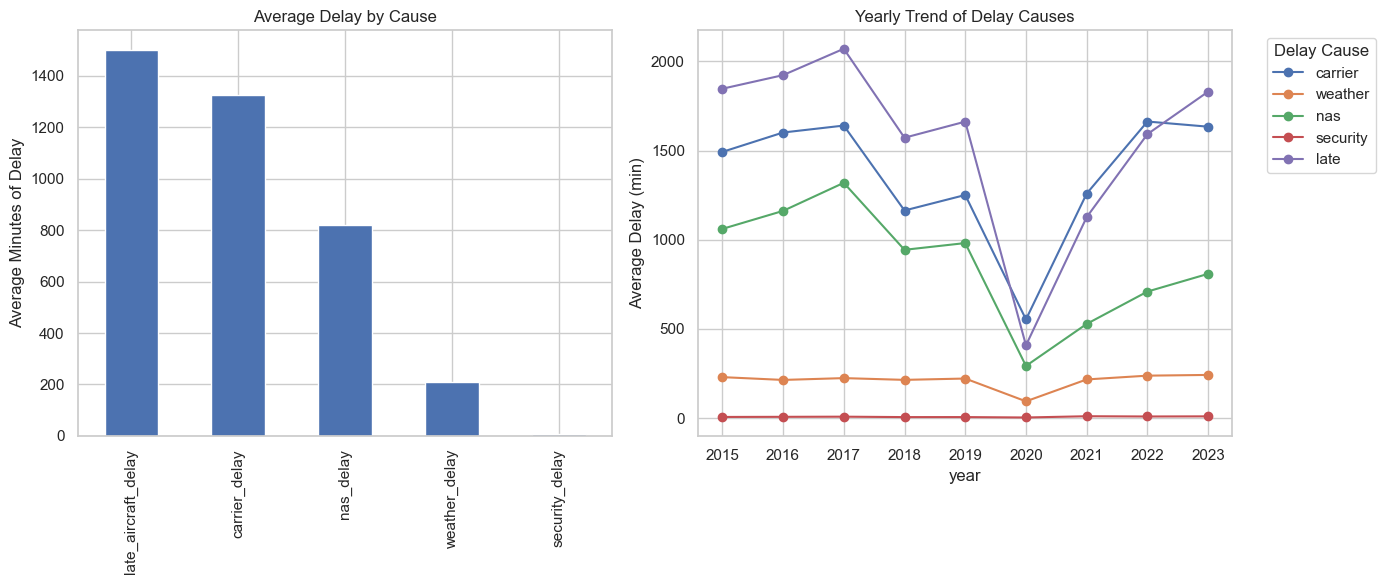

In [110]:
delay_causes = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df['total_delay'] = df[delay_causes].sum(axis=1)

cause_avg = df[delay_causes].mean().sort_values(ascending=False)
cause_by_year = df.groupby('year')[delay_causes].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Average delay by cause
cause_avg.plot(kind='bar', ax=ax1)
ax1.set_title('Average Delay by Cause')
ax1.set_ylabel('Average Minutes of Delay')

# Plot 2: Yearly trend of delay causes 
cause_by_year.plot(marker='o', ax=ax2)
ax2.set_title('Yearly Trend of Delay Causes')
ax2.set_ylabel('Average Delay (min)')
ax2.legend(title='Delay Cause')
ax2.legend(title='Delay Cause', labels=['carrier','weather','nas','security','late'], loc='upper left', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

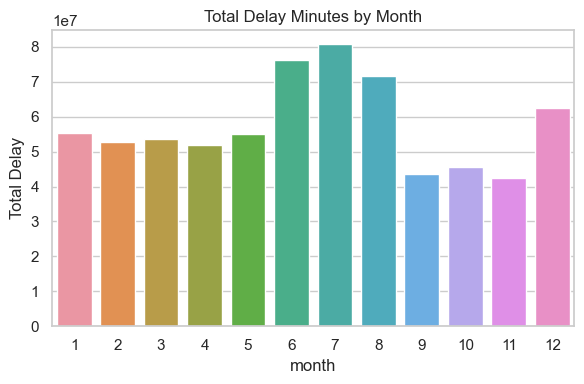

In [111]:
monthly_delay = df.groupby('month')['arr_delay'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=monthly_delay, x='month', y='arr_delay')
plt.title('Total Delay Minutes by Month')
plt.ylabel('Total Delay')
plt.tight_layout()
plt.show()

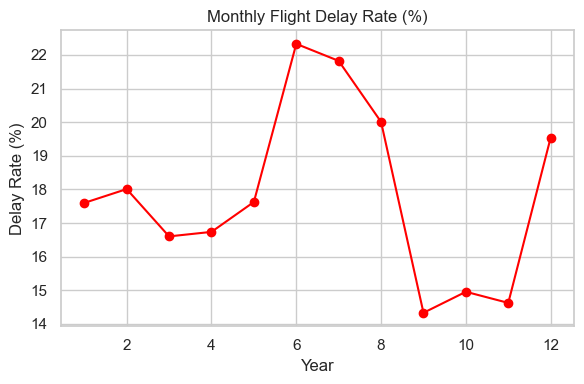

In [112]:
monthly = df.groupby('month')[['arr_del15', 'arr_flights']].sum()
monthly['delay_rate'] = (monthly['arr_del15'] / monthly['arr_flights']) * 100

plt.figure(figsize=(6, 4))
monthly['delay_rate'].plot(kind='line', marker='o', color='red')
plt.title('Monthly Flight Delay Rate (%)')
plt.xlabel('Year')
plt.ylabel('Delay Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Average Delay by Month:**

The monthly analysis reveals clear seasonal trends in airline delays.
Certain months i.e.. 6,7,8 consistently experience higher delays than others.

**Monthly Delay Rate Trends:**

The line plot of monthly delay rates shows cyclical patterns.
This suggests seasonal factors significantly impact flight punctuality.

**Year-over-Year Comparison:**

Yearly analysis shows variation in delay patterns from *2015 to 2023 where 2020 was the least delayed due to covid breakthrough in the world *.
The trend indicates changing operational conditions over time.

**Key Monthly Insights:**

Certain months show consistently higher delay rates.
The analysis suggests weather and operational factors create predictable seasonal patterns.
Monthly delay rates help identify peak problem periods for airlines.

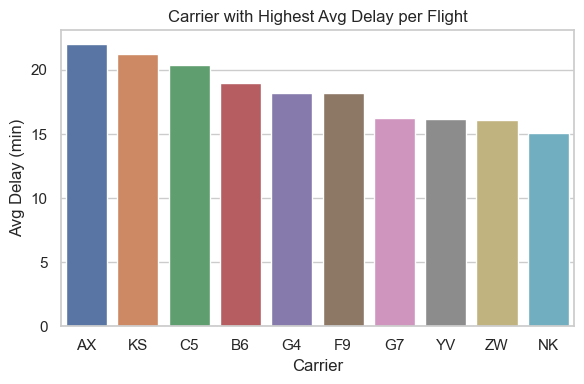

In [113]:
if 'carrier' in df.columns:
    airport_delays = df.groupby('carrier')[['arr_delay', 'flights_landed']].sum()
    airport_delays['avg_delay_per_flight'] = airport_delays['arr_delay'] / airport_delays['flights_landed']
    top_airports = airport_delays.sort_values(by='avg_delay_per_flight', ascending=False).head(10)

    plt.figure(figsize=(6,4))
    sns.barplot(x=top_airports.index.astype(str), y=top_airports['avg_delay_per_flight'])
    plt.title('Carrier with Highest Avg Delay per Flight')
    plt.ylabel('Avg Delay (min)')
    plt.xlabel('Carrier')
    plt.tight_layout()
    plt.show()

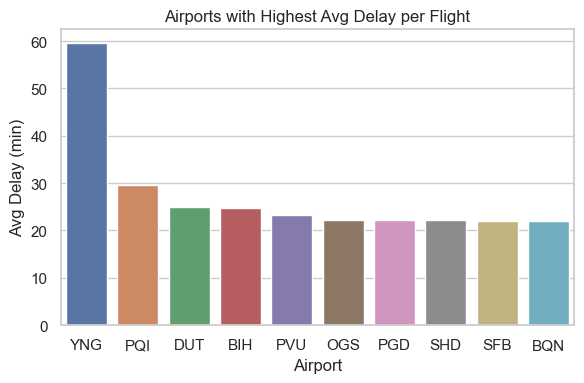

In [114]:
if 'airport' in df.columns:
    airport_delays = df.groupby('airport')[['arr_delay', 'flights_landed']].sum()
    airport_delays['avg_delay_per_flight'] = airport_delays['arr_delay'] / airport_delays['flights_landed']
    top_airports = airport_delays.sort_values(by='avg_delay_per_flight', ascending=False).head(10)

    plt.figure(figsize=(6,4))
    sns.barplot(x=top_airports.index.astype(str), y=top_airports['avg_delay_per_flight'])
    plt.title('Airports with Highest Avg Delay per Flight')
    plt.ylabel('Avg Delay (min)')
    plt.xlabel('Airport')
    plt.tight_layout()
    plt.show()

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


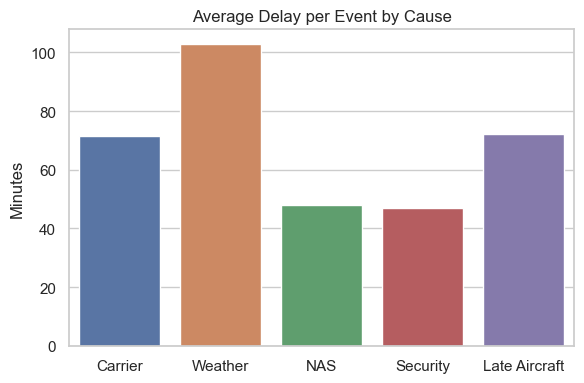

In [115]:
cause_avg_delay = {
    'Carrier': df['carrier_delay'].sum() / df['carrier_ct'].sum(),
    'Weather': df['weather_delay'].sum() / df['weather_ct'].sum(),
    'NAS': df['nas_delay'].sum() / df['nas_ct'].sum(),
    'Security': df['security_delay'].sum() / df['security_ct'].sum(),
    'Late Aircraft': df['late_aircraft_delay'].sum() / df['late_aircraft_ct'].sum()
}

plt.figure(figsize=(6,4))
sns.barplot(x=list(cause_avg_delay.keys()), y=list(cause_avg_delay.values()))
plt.title('Average Delay per Event by Cause')
plt.ylabel('Minutes')
plt.tight_layout()
plt.show()

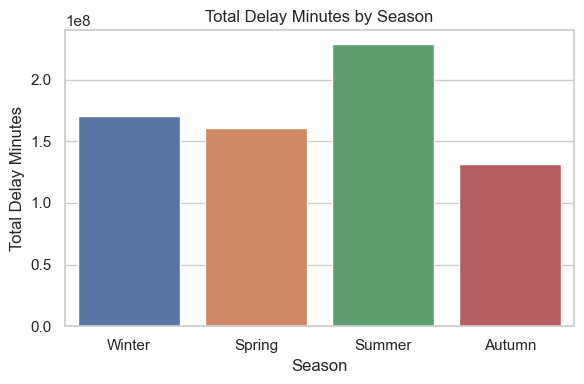

In [116]:
# 1. Define Seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(get_season)

# 2. Total Delay by Season
seasonal_delay = df.groupby('season')['arr_delay'].sum().reindex(['Winter', 'Spring', 'Summer', 'Autumn'])

plt.figure(figsize=(6,4))
sns.barplot(x=seasonal_delay.index, y=seasonal_delay.values)
plt.title('Total Delay Minutes by Season')
plt.ylabel('Total Delay Minutes')
plt.xlabel('Season')
plt.tight_layout()
plt.show()

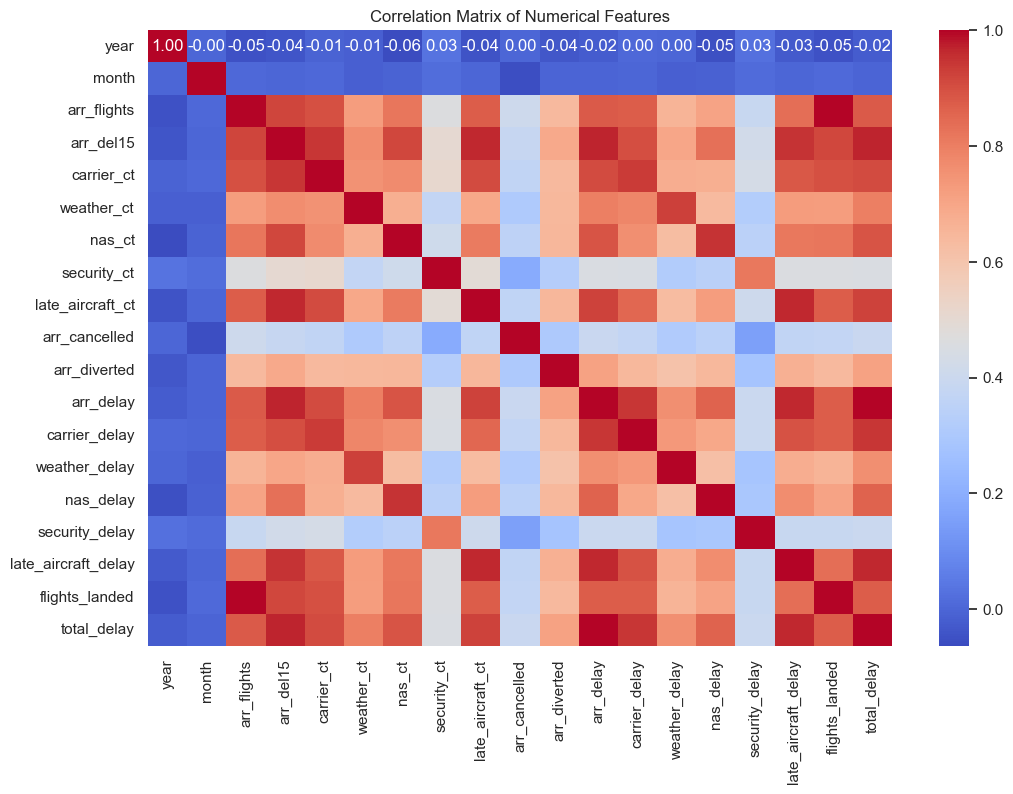

In [117]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [118]:
airport_freq = df['airport'].value_counts()
df['airport_encoded'] = df['airport'].map(airport_freq)

freq_map = df['carrier'].value_counts(normalize=True)
df['carrier_freq_encoded'] = df['carrier'].map(freq_map)

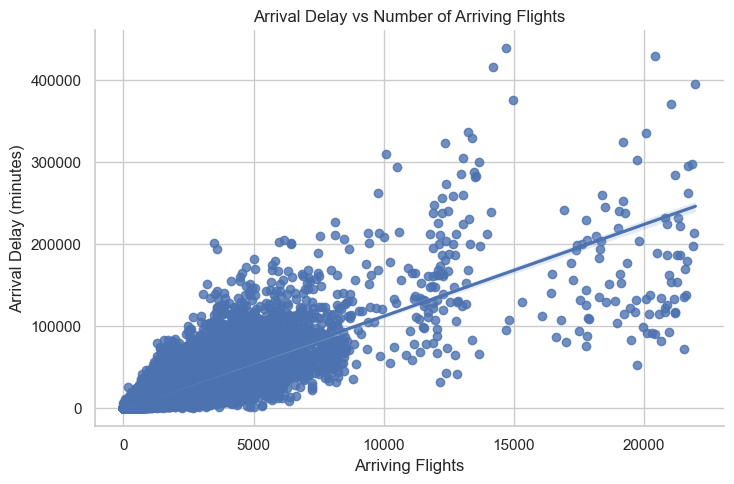

Correlation between arrival flights and arrival delay: 0.88


In [119]:
# Scatter plot with regression line
sns.lmplot(x='arr_flights', y='arr_delay', data=df, height=5, aspect=1.5)
plt.title('Arrival Delay vs Number of Arriving Flights')
plt.xlabel('Arriving Flights')
plt.ylabel('Arrival Delay (minutes)')
plt.tight_layout()
plt.show()

# Correlation
corr = df['arr_flights'].corr(df['arr_delay'])
print(f"Correlation between arrival flights and arrival delay: {corr:.2f}")


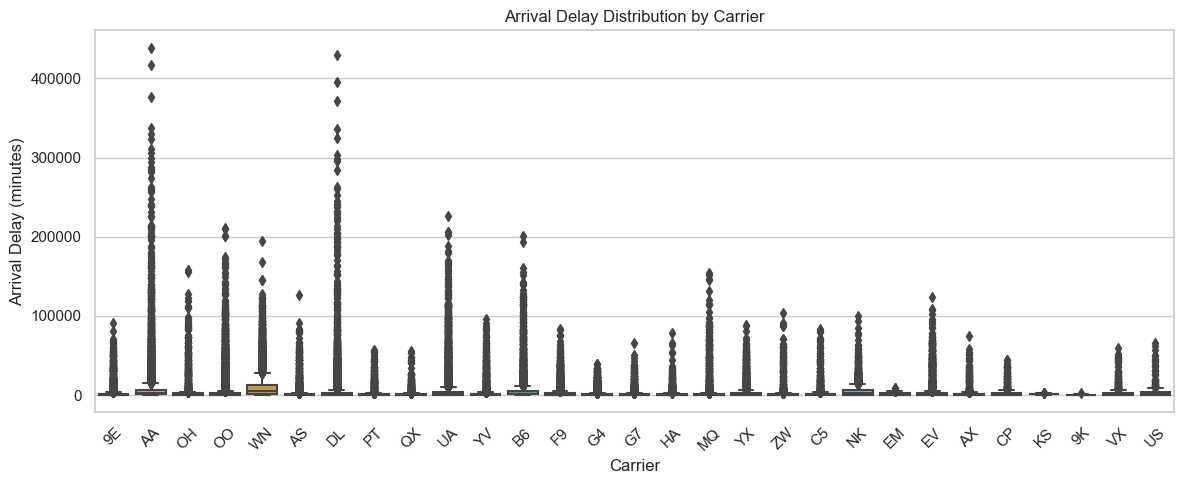

carrier
WN    10697.003482
AA     9033.697645
B6     6372.604804
UA     6131.307678
DL     4831.587400
NK     4821.331515
US     4235.172811
VX     3567.180708
OO     3368.435867
YX     3088.972241
CP     2931.949079
EV     2866.663473
OH     2557.316216
F9     2373.080674
YV     2157.271957
C5     2106.338222
9E     1968.325077
AX     1962.772656
HA     1942.968750
AS     1924.605185
MQ     1811.940968
ZW     1639.131413
G7     1470.271035
PT     1448.047413
EM     1430.187500
KS     1314.113636
G4     1295.892922
QX     1265.693438
9K      475.400000
Name: arr_delay, dtype: float64


In [120]:
# Boxplot: Delay distribution per carrier
plt.figure(figsize=(12, 5))
sns.boxplot(x='carrier', y='arr_delay', data=df)
plt.title('Arrival Delay Distribution by Carrier')
plt.ylabel('Arrival Delay (minutes)')
plt.xlabel('Carrier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group-wise average delay
carrier_delay = df.groupby('carrier')['arr_delay'].mean().sort_values(ascending=False)
print(carrier_delay)


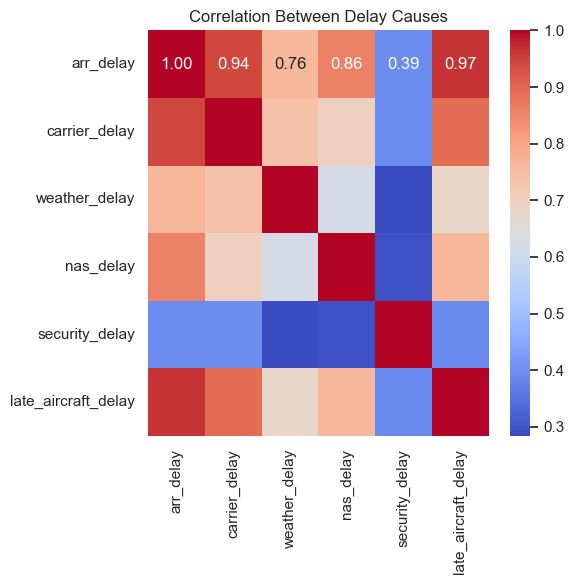

In [121]:
# Select numeric delay-related features
delay_cols = ['arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Compute and plot heatmap
plt.figure(figsize=(6,6))
sns.heatmap(df[delay_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Delay Causes')
plt.tight_layout()
plt.show()


**Correlation Analysis**
The correlation matrix reveals strong relationships between variables:

Highest Correlations with Total Arrival Delay:

1)Late aircraft delay: 0.955 (extremely strong positive correlation)

2)Carrier delay: 0.952 (extremely strong positive correlation)

3)NAS delay: 0.898 (very strong positive correlation)

4)Weather delay: 0.705 (strong positive correlation)

# Handling Outliers

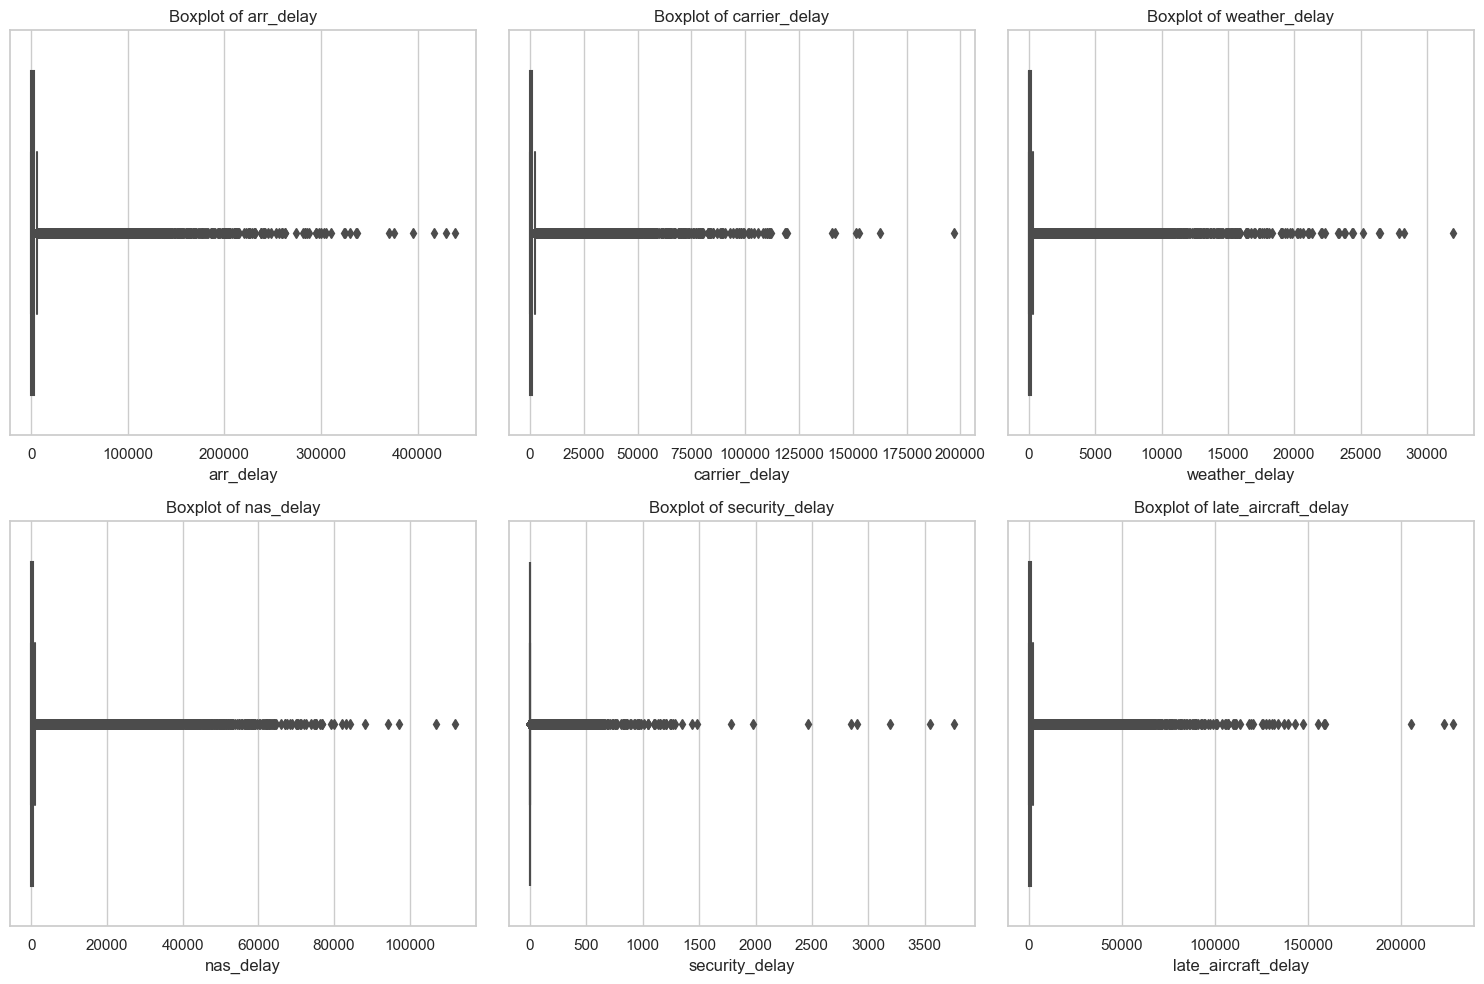

In [122]:
delay_cols = ['arr_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']

plt.figure(figsize=(15, 10))
for i, col in enumerate(delay_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [123]:
# 1) Winsorize (cap) the original delays at the 95th percentile
for col in delay_cols:
    p95 = df[col].quantile(0.95)
    df[col] = df[col].clip(upper=p95) 

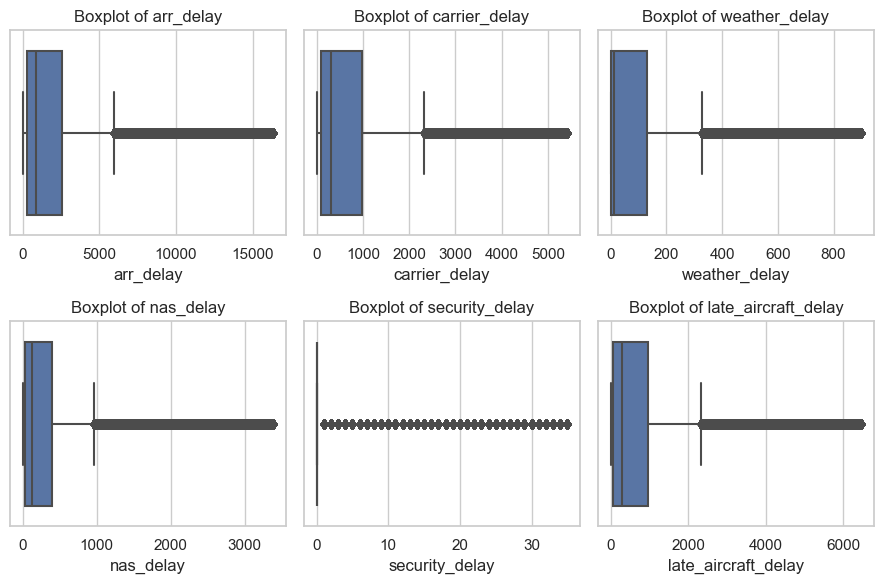

In [124]:
delay_cols = ['arr_delay','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']

plt.figure(figsize=(9, 6))
for i, col in enumerate(delay_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# Feature Engineering

In [125]:
# 1. Delay Ratio Features
df['delay_ratio'] = df['arr_del15'] / df['arr_flights']
df['cancel_ratio'] = df['arr_cancelled'] / df['arr_flights']
df['divert_ratio'] = df['arr_diverted'] / df['arr_flights']

# 2. Cause-Based Ratios (how much delay is from each cause)
df['late_aircraft_ratio'] = df['late_aircraft_delay'] / df['arr_delay']
df['carrier_delay_ratio'] = df['carrier_delay'] / df['arr_delay']
df['weather_delay_ratio'] = df['weather_delay'] / df['arr_delay']
df['nas_delay_ratio'] = df['nas_delay'] / df['arr_delay']
df['security_delay_ratio'] = df['security_delay'] / df['arr_delay']

# 3. Average Delay per Flight
df['avg_delay_per_flight'] = df['arr_delay'] / df['flights_landed']

# 4. Monthly/Cyclic Time Features
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

#Insight: A "robustness" indicator. Higher = more on-time flights despite traffic.
df['resilience_score'] = (df['arr_flights'] - df['arr_del15']) / (df['arr_del15'] + 1)

# Operational Complexity Index (OCI)
#Insight: Combines traffic, cancellations, and diversions to estimate how “stressful” the operation is.

df['OCI'] = (df['arr_flights'] * (1 + df['arr_cancelled'] + df['arr_diverted'])) / (df['arr_delay'] + 1)

#Delay Concentration Index (DCI)
#Insight: Are delays caused by one dominant factor or evenly spread? Useful for modeling cause isolation.
total_cause_delay = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].sum(axis=1)
max_cause_delay = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].max(axis=1)
df['DCI'] = max_cause_delay / (total_cause_delay + 1e-3)

#  Traffic Density Proxy
df['traffic_density'] = df['arr_flights'] / df.groupby('airport')['arr_flights'].transform('max')

# Historical Mean Delay Feature (per airport or carrier if columns available)
if 'airport' in df.columns:
    df['airport_mean_delay'] = df.groupby('airport')['arr_delay'].transform('mean')

if 'carrier' in df.columns:
    df['carrier_mean_delay'] = df.groupby('carrier')['arr_delay'].transform('mean')
    
df['main_delay_reason'] = df[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']].idxmax(axis=1)    
    

In [126]:
one_hot_encoded = pd.get_dummies(df['main_delay_reason'], prefix='reason').astype(int)
df = pd.concat([df, one_hot_encoded], axis=1)
df.drop('main_delay_reason', axis=1, inplace=True)

In [127]:
season_dummies = pd.get_dummies(df['season'], prefix='season').astype(int)
df = pd.concat([df, season_dummies], axis=1)
df.drop('season', axis=1, inplace=True)

In [128]:
df.sample(5)

,year,month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,flights_landed,total_delay,airport_encoded,carrier_freq_encoded,delay_ratio,cancel_ratio,divert_ratio,late_aircraft_ratio,carrier_delay_ratio,weather_delay_ratio,nas_delay_ratio,security_delay_ratio,avg_delay_per_flight,month_sin,month_cos,resilience_score,OCI,DCI,traffic_density,airport_mean_delay,carrier_mean_delay,reason_carrier_delay,reason_late_aircraft_delay,reason_nas_delay,reason_security_delay,reason_weather_delay,season_Autumn,season_Spring,season_Summer,season_Winter
87583,2020,2,UA,BOS,940.0,126.0,30.06,1.47,47.58,0.0,46.89,1.0,4.0,7767.0,1410.0,72.0,2399.0,0.0,3886.0,939.0,7767.0,1390,0.058141,0.134043,0.001064,0.004255,0.500322,0.181537,0.009270,0.308871,0.0,8.271565,0.866025,5.000000e-01,6.409449,0.726056,0.500322,0.194657,6540.051799,3474.753820,0,1,0,0,0,0,0,0,1
127064,2018,7,C5,BTV,92.0,34.0,8.30,0.98,6.98,0.0,17.74,4.0,1.0,3179.0,829.0,254.0,351.0,0.0,1745.0,88.0,3179.0,945,0.019045,0.369565,0.043478,0.010870,0.548915,0.260774,0.079899,0.110412,0.0,36.125000,-0.500000,-8.660254e-01,1.657143,0.173585,0.548915,0.321678,900.939683,1634.595189,0,1,0,0,0,0,0,1,0
96970,2019,9,AA,ICT,88.0,28.0,12.34,0.00,4.42,0.0,11.24,1.0,0.0,1624.0,631.0,0.0,177.0,0.0,816.0,87.0,1624.0,1095,0.060956,0.318182,0.011364,0.000000,0.502463,0.388547,0.000000,0.108990,0.0,18.666667,-1.000000,-1.836970e-16,2.068966,0.108308,0.502463,0.250000,919.265753,4750.122262,0,1,0,0,0,1,0,0,0
17418,2023,3,DL,MOB,31.0,5.0,3.48,0.25,0.51,0.0,0.76,1.0,0.0,188.0,113.0,14.0,23.0,0.0,38.0,30.0,188.0,550,0.083448,0.161290,0.032258,0.000000,0.202128,0.601064,0.074468,0.122340,0.0,6.266667,1.000000,6.123234e-17,4.333333,0.328042,0.601061,0.072261,974.441818,2903.480819,1,0,0,0,0,0,1,0,0
161880,2016,4,AS,SJC,371.0,33.0,9.69,0.00,9.23,0.0,14.08,1.0,0.0,1297.0,446.0,0.0,253.0,0.0,598.0,370.0,1297.0,1046,0.043314,0.088949,0.002695,0.000000,0.461064,0.343870,0.000000,0.195066,0.0,3.505405,0.866025,-5.000000e-01,9.941176,0.571649,0.461064,0.110879,3081.338432,1507.856056,0,1,0,0,0,0,1,0,0


In [129]:
df.drop(columns=['reason_carrier_delay'],axis=1,inplace=True)

In [130]:
year_dummies = pd.get_dummies(df['year'], prefix='year').astype(int)
df = pd.concat([df, year_dummies], axis=1)
df.drop('year', axis=1, inplace=True)

In [131]:
from sklearn.preprocessing import StandardScaler

features_to_scale = [
    'avg_delay_per_flight', 'resilience_score', 'OCI', 'DCI', 'traffic_density',
    'carrier_mean_delay', 'airport_mean_delay'
]

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [132]:
# For Binary classification

df['is_delayed'] = (df['arr_del15'] / df['arr_flights']) > 0.2
df['is_delayed'] = df['is_delayed'].astype(int)

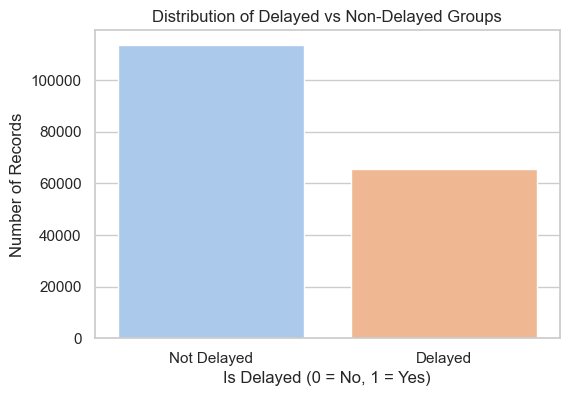

In [133]:
sns.set_style("whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x='is_delayed', data=df, palette='pastel')
plt.title('Distribution of Delayed vs Non-Delayed Groups')
plt.xlabel('Is Delayed (0 = No, 1 = Yes)')
plt.ylabel('Number of Records')
plt.xticks([0, 1], ['Not Delayed', 'Delayed'])

plt.show()

In [134]:
# Now this is for regression model
df['avg_arr_delay'] = df['arr_delay'] / df['arr_flights']

In [135]:
df.head(5)

,month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,flights_landed,total_delay,airport_encoded,carrier_freq_encoded,delay_ratio,cancel_ratio,divert_ratio,late_aircraft_ratio,carrier_delay_ratio,weather_delay_ratio,nas_delay_ratio,security_delay_ratio,avg_delay_per_flight,month_sin,month_cos,resilience_score,OCI,DCI,traffic_density,airport_mean_delay,carrier_mean_delay,reason_late_aircraft_delay,reason_nas_delay,reason_security_delay,reason_weather_delay,season_Autumn,season_Spring,season_Summer,season_Winter,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,year_2021,year_2022,year_2023,is_delayed,avg_arr_delay
0,12,9E,ABE,72.0,5.0,2.46,1.00,0.73,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0,72.0,672.0,561,0.041727,0.069444,0.000000,0.0,0.025298,0.090774,0.854167,0.029762,0.0,-0.158004,-2.449294e-16,1.0,0.841306,-0.043553,1.480327,0.359594,-0.730410,-0.689326,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,9.333333
1,12,9E,AEX,62.0,7.0,4.25,0.00,1.00,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0,62.0,348.0,274,0.041727,0.112903,0.000000,0.0,0.181034,0.724138,0.000000,0.094828,0.0,-0.396676,-2.449294e-16,1.0,0.143890,-0.043121,0.854348,-0.156609,-0.702408,-0.689326,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,5.612903
2,12,9E,AGS,95.0,10.0,5.94,0.00,1.06,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0,95.0,859.0,447,0.041727,0.105263,0.000000,0.0,0.321304,0.623981,0.000000,0.054715,0.0,-0.176687,-2.449294e-16,1.0,0.282389,-0.043532,0.372188,0.598370,-0.727555,-0.689326,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,9.042105
3,12,9E,ALB,23.0,2.0,0.56,0.00,0.00,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0,22.0,75.0,1285,0.041727,0.086957,0.043478,0.0,0.880000,0.120000,0.000000,0.000000,0.0,-0.538055,-2.449294e-16,1.0,0.164204,-0.040508,1.604641,-0.791233,-0.607888,-0.689326,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,3.260870
4,12,9E,ATL,2111.0,256.0,76.88,8.75,52.43,0.0,117.94,1.0,0.0,16349.0,5419.2,732.0,1487.0,0.0,6463.2,2110.0,21424.0,1413,0.041727,0.121270,0.000474,0.0,0.395327,0.331470,0.044773,0.090954,0.0,-0.259684,-2.449294e-16,1.0,0.199613,-0.042629,-0.425240,-0.615436,2.077439,-0.689326,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,7.744671


In [136]:
df.drop(columns=['flights_landed'], inplace=True)

In [137]:
df.drop(columns=['month','carrier','airport'],axis=1,inplace=True)

In [138]:
df.isnull().sum()

arr_flights                      0
arr_del15                        0
carrier_ct                       0
weather_ct                       0
nas_ct                           0
security_ct                      0
late_aircraft_ct                 0
arr_cancelled                    0
arr_diverted                     0
arr_delay                        0
carrier_delay                    0
weather_delay                    0
nas_delay                        0
security_delay                   0
late_aircraft_delay              0
total_delay                      0
airport_encoded                  0
carrier_freq_encoded             0
delay_ratio                      0
cancel_ratio                     0
divert_ratio                     0
late_aircraft_ratio           8623
carrier_delay_ratio           8623
weather_delay_ratio           8623
nas_delay_ratio               8623
security_delay_ratio          8623
avg_delay_per_flight           234
month_sin                        0
month_cos           

In [139]:
# 1. Cause‐ratio features → zero when no total delay occurred
cause_ratio_cols = [
    'late_aircraft_ratio', 'carrier_delay_ratio',
    'weather_delay_ratio', 'nas_delay_ratio',
    'security_delay_ratio'
]
df[cause_ratio_cols] = df[cause_ratio_cols].fillna(0)

# 2. avg_delay_per_flight → zero when no flights
df['avg_delay_per_flight'] = df['avg_delay_per_flight'].fillna(0)

# Regression Model

In [140]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.svm import SVR
import numpy as np

target = 'avg_arr_delay'

# Drop columns that directly leak delay info
leaky_cols = [
    'arr_del15',
    'arr_flights',
    'delay_ratio',
    'avg_delay_per_flight',
    'carrier_delay_ratio',
    'weather_delay_ratio',
    'nas_delay_ratio',
    'security_delay_ratio',
    'late_aircraft_ratio',
    'resilience_score',
    'OCI', 'DCI',
    'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
    'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
    'arr_delay', 'avg_arr_delay',
    'traffic_density',
    'carrier_mean_delay', 'airport_mean_delay'
]

X = df.drop(columns=leaky_cols)
y = df[target]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base models to test
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'DT': DecisionTreeRegressor(random_state=42),
    'RF': RandomForestRegressor(n_estimators=200, random_state=42),
    'GBR': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    'XGB': XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42),
}

# Run each model in a pipeline (with scaling for sensitive ones)
for name, model in models.items():
    if name in ['Linear', 'Ridge', 'Lasso', 'SVR']:  # Needs scaling
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('regressor', model)
        ])
    else:
        pipeline = Pipeline([
            ('regressor', model)
        ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2  = r2_score(y_test, y_pred)
    print(f'{name} => MAE: {mae:.2f}, RMSE: {rmse:.2f},R2: {r2:.2f}')

Linear => MAE: 5.11, RMSE: 9.43,R2: 0.30
Ridge => MAE: 5.11, RMSE: 9.43,R2: 0.30
Lasso => MAE: 5.09, RMSE: 9.43,R2: 0.30
DT => MAE: 3.67, RMSE: 12.56,R2: -0.23
RF => MAE: 2.68, RMSE: 7.87,R2: 0.52
GBR => MAE: 3.33, RMSE: 10.12,R2: 0.20
XGB => MAE: 2.50, RMSE: 7.61,R2: 0.55
CatBoost => MAE: 2.35, RMSE: 7.20,R2: 0.59


In [141]:
# From this we get to know that catboost performs the best so we will further use it

In [142]:
final_model =CatBoostRegressor(verbose=0, random_state=42)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)

# Classification Model

C:\Users\User\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:37:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: Logistic Regression
Accuracy: 0.6844
Precision: 0.5972
Recall: 0.4049
F1 Score: 0.4826
ROC AUC: 0.7215
Confusion Matrix:
[[19233  3554]
 [ 7744  5269]]
----------------------------------------
Model: Decision Tree
Accuracy: 0.7615
Precision: 0.6716
Recall: 0.6730
F1 Score: 0.6723
ROC AUC: 0.7425
Confusion Matrix:
[[18504  4283]
 [ 4255  8758]]
----------------------------------------
Model: Random Forest
Accuracy: 0.8087
Precision: 0.7655
Recall: 0.6828
F1 Score: 0.7218
ROC AUC: 0.8791
Confusion Matrix:
[[20065  2722]
 [ 4128  8885]]
----------------------------------------
Model: Gradient Boosting
Accuracy: 0.7843
Precision: 0.7631
Recall: 0.5896
F1 Score: 0.6652
ROC AUC: 0.8526
Confusion Matrix:
[[20405  2382]
 [ 5341  7672]]
----------------------------------------
Model: XGBoost
Accuracy: 0.8334
Precision: 0.8047
Recall: 0.7154
F1 Score: 0.7574
ROC AUC: 0.9123
Confusion Matrix:
[[20527  2260]
 [ 3703  9310]]
----------------------------------------
Model: CatBoost
Accuracy: 

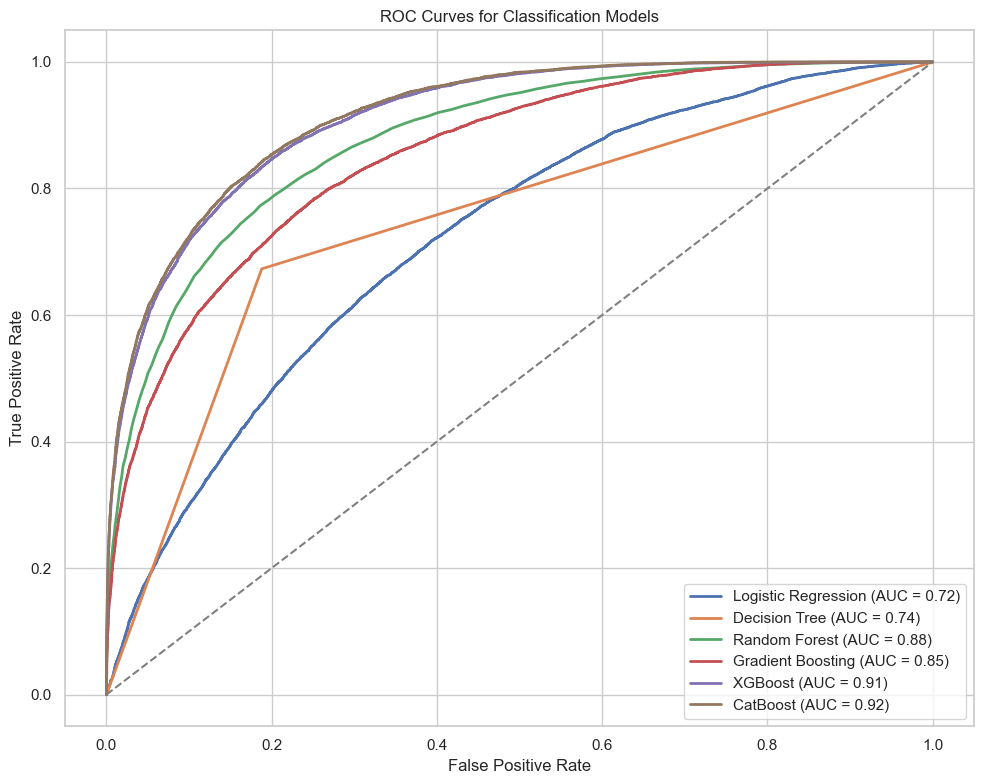

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, roc_curve, auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import catboost as cb
import matplotlib.pyplot as plt
import seaborn as sns

target_col = "is_delayed"
leaky_cols = [
    'arr_del15',
    'arr_flights',
    'delay_ratio',
    'avg_delay_per_flight',
    'carrier_delay_ratio',
    'weather_delay_ratio',
    'nas_delay_ratio',
    'security_delay_ratio',
    'late_aircraft_ratio',
    'resilience_score',
    'OCI', 'DCI',
    'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
    'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
    'arr_delay', 'avg_arr_delay',
    'traffic_density',
    'carrier_mean_delay', 'airport_mean_delay'
]


X = df.drop(columns=leaky_cols + [target_col])
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define Models
models = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('clf', LogisticRegression(max_iter=1000))
    ]),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": cb.CatBoostClassifier(verbose=0)
}

results = {}
model_probs = {}  # Store y_prob for each model for ROC plotting

# 3. Training & Evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Store performance metrics
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_prob),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }
    
    # Store probabilities for ROC curve plotting
    model_probs[name] = y_prob

# 4. Display Results
for name, metrics in results.items():
    print(f"Model: {name}")
    for metric, score in metrics.items():
        if metric != "Confusion Matrix":
            print(f"{metric}: {score:.4f}")
    print("Confusion Matrix:")
    print(metrics["Confusion Matrix"])
    print("-" * 40)

# 5. ROC Curve Plot
plt.figure(figsize=(10, 8))

for name, y_prob in model_probs.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [144]:
# From this we can see that Catboost performs the best so we will chose catboost as the model

# OAI

In [145]:
X_reg = df.drop(columns=leaky_cols + ['avg_arr_delay'])
y_reg = df['avg_arr_delay']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

cat_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('cat', CatBoostRegressor(verbose=0, random_state=42))
])

cat_pipeline.fit(X_train_reg, y_train_reg)
y_pred_reg = cat_pipeline.predict(X_test_reg)

In [146]:
controllable_weights = {
    'reason_late_aircraft_delay': 3,
    'reason_nas_delay': 1,
    'reason_security_delay': 0.5,
    'reason_weather_delay': 0.5
}

max_weight = max(controllable_weights.values())
for k in controllable_weights:
    controllable_weights[k] /= max_weight 


X_test_copy = X_test_reg.copy()
errors = np.abs(y_pred_reg - y_test_reg)

weights = np.zeros(len(X_test_copy))

for col, weight in controllable_weights.items():
    if col in X_test_copy.columns:
        weights += X_test_copy[col] * weight


weights = np.where(weights == 0, 0.1, weights)  

OAI = np.sum(weights * errors) / np.sum(weights)
print(f"✅ Operational Adjustability Index (OAI): {OAI:.4f}")

✅ Operational Adjustability Index (OAI): 2.2277


In [147]:
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"CatBoost => MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

CatBoost => MAE: 2.36, RMSE: 0.41, R2: 0.59


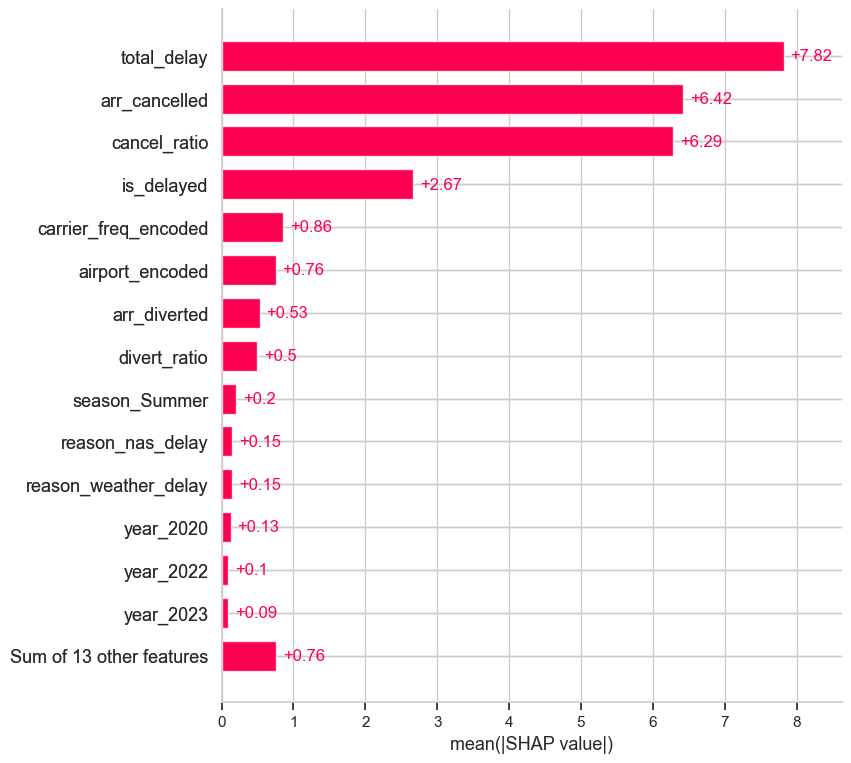

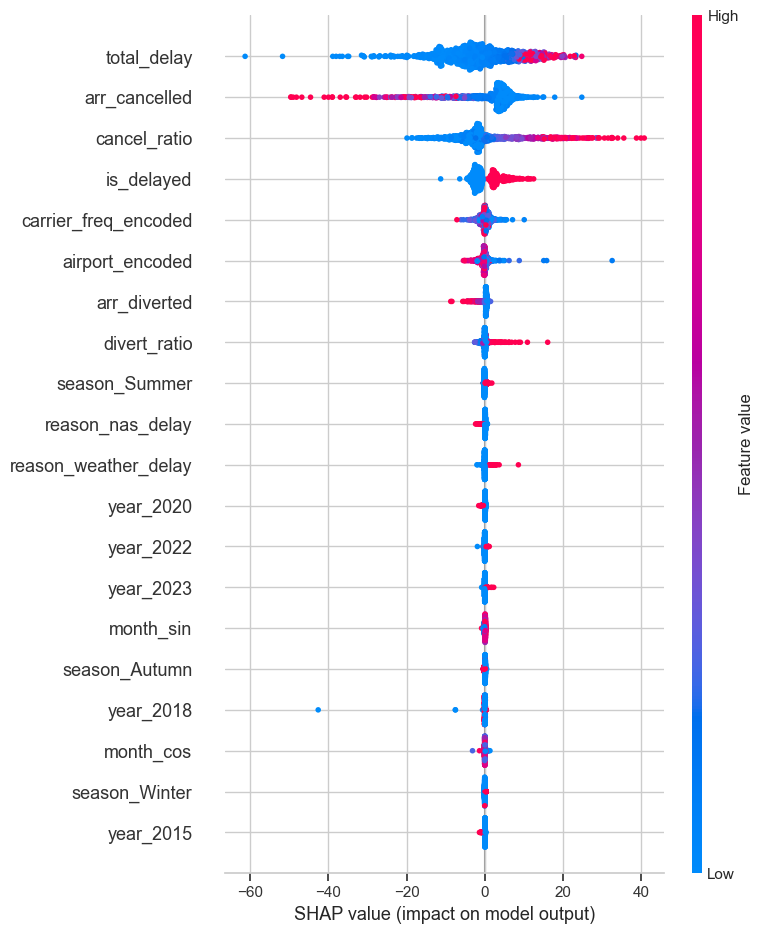

In [148]:
import shap
import matplotlib.pyplot as plt

# 1. Initialize SHAP explainer for CatBoost
explainer = shap.Explainer(cat_model)

# 2. Sample a subset of the test set (to keep it fast)
X_sample = X_test_reg.sample(1000, random_state=42)

# 3. Compute SHAP values
shap_values = explainer(X_sample)

# 4. Bar plot: Mean absolute SHAP values per feature
shap.plots.bar(shap_values, max_display=15)  # top 15 features

# 5. Detailed summary plot
shap.summary_plot(shap_values.values, X_sample, feature_names=X_sample.columns)
